# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [26]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install mlxtend
%pip install seaborn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [28]:
# load the data set and show the first five transaction
import pandas as pd
data = pd.read_csv(r"C:\Users\ACER\Downloads\healthcare_dataset.csv", sep=',')
data.head(20)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


DATA CLEANING, TRANSFORMATION

In [29]:
#Missing values
data.isnull().any()

Name                  False
Age                   False
Gender                False
Blood Type            False
Medical Condition     False
Date of Admission     False
Doctor                False
Hospital              False
Insurance Provider    False
Billing Amount        False
Room Number           False
Admission Type        False
Discharge Date        False
Medication            False
Test Results          False
dtype: bool

In [30]:
#Cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [10]:
# Drop unnecessary column
list_kolom = ['Name', 'Date of Admission', 'Discharge Date', 'Insurance Provider','Billing Amount', 'Room Number', 'Medication']
df = data.drop(columns=list_kolom, axis=1)
display(df)

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Admission Type,Test Results
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Elective,Inconclusive
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",Emergency,Normal
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Emergency,Normal
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Urgent,Abnormal
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",Urgent,Normal
...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,Samuel Moody,"Wood, Martin and Simmons",Elective,Abnormal
9996,47,Female,AB+,Arthritis,Christopher Yates,Nash-Krueger,Emergency,Normal
9997,54,Male,B-,Arthritis,Robert Nicholson,Larson and Sons,Elective,Normal
9998,84,Male,A+,Arthritis,Jamie Lewis,Wilson-Lyons,Urgent,Normal


VISUALITATION (EDA)

In [31]:
print(df.describe())

                Age        Gender    Blood Type  Medical Condition  \
count  10000.000000  10000.000000  10000.000000       10000.000000   
mean      51.452200      0.492500      3.501100           2.487500   
std       19.588974      0.499969      2.286071           1.701803   
min       18.000000      0.000000      0.000000           0.000000   
25%       35.000000      0.000000      2.000000           1.000000   
50%       52.000000      0.000000      3.000000           2.000000   
75%       68.000000      1.000000      5.000000           4.000000   
max       85.000000      1.000000      7.000000           5.000000   

             Doctor      Hospital  Admission Type  Test Results  
count  10000.000000  10000.000000    10000.000000  10000.000000  
mean    4712.651000   4349.432600        1.014900      0.981100  
std     2713.556877   2500.066462        0.814337      0.819762  
min        0.000000      0.000000        0.000000      0.000000  
25%     2354.750000   2195.750000      

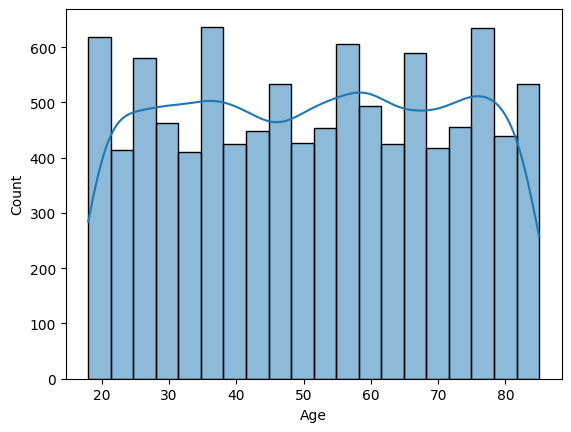

In [12]:
#Distribution plots (age)
sns.histplot(df['Age'], bins=20, kde=True)
plt.show()

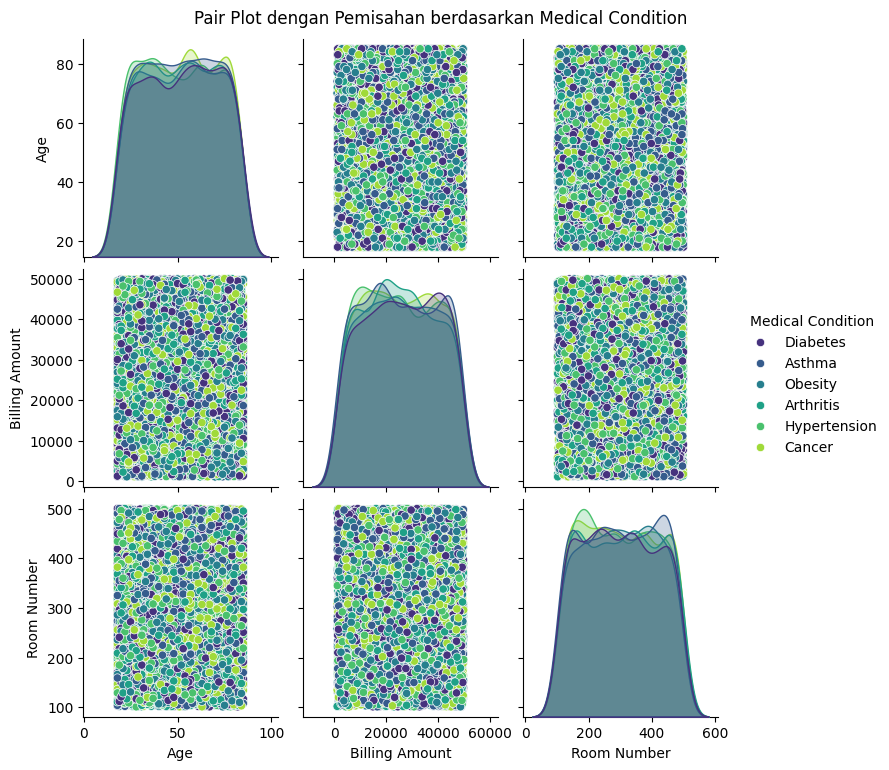

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Menggambar pair plot untuk melihat hubungan antar variabel dengan pemisahan berdasarkan 'Medical Condition'
sns.pairplot(data, hue='Medical Condition', palette='viridis')
plt.suptitle('Pair Plot dengan Pemisahan berdasarkan Medical Condition', y=1.02)
plt.show()

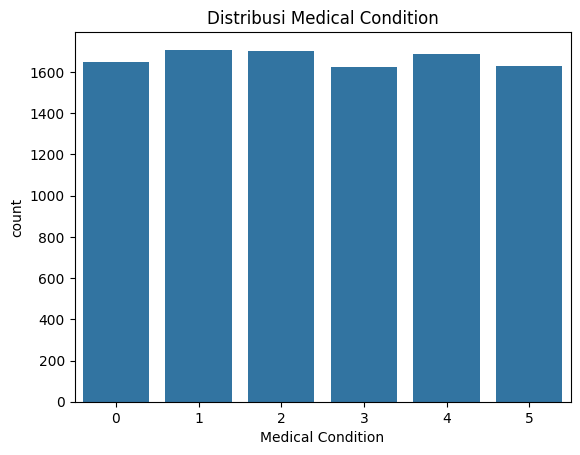

In [33]:
sns.countplot(x='Medical Condition', data=df)
plt.title('Distribusi Medical Condition')
plt.show()

Use at least one machine learning techniques (Regression, Classification, Clustering)

In [34]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for col in df.columns:
    if col!='Age':
        df[col]=lc.fit_transform(df[col])
df.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Admission Type,Test Results
0,81,0,7,3,7167,7960,0,1
1,35,1,6,1,2597,978,1,2
2,61,1,5,5,7180,7996,1,2
3,49,1,5,1,1169,2482,2,0
4,51,1,7,0,2775,3908,2,2


In [35]:
#PREPARE DATA
X = df.drop('Test Results', axis=1)
y = df['Test Results']  

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))



Accuracy: 0.3455
              precision    recall  f1-score   support

           0       0.36      0.38      0.37       706
           1       0.33      0.33      0.33       636
           2       0.35      0.32      0.33       658

    accuracy                           0.35      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.35      0.35      0.35      2000



c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

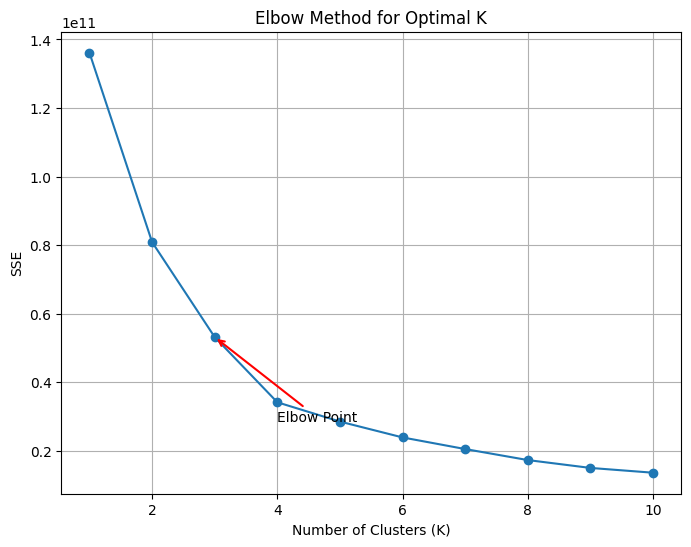

In [24]:
import pandas as pd
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt

#
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.annotate('Elbow Point', xy=(3, inertia[2]), xytext=(4, inertia[4]), 
             arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))
plt.grid(True)
plt.show()


Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

Random Forest:
  Testing Accuracy: 0.1725
              precision    recall  f1-score   support

           0       0.19      0.21      0.20       319
           1       0.15      0.17      0.16       332
           2       0.21      0.19      0.20       363
           3       0.15      0.17      0.16       303
           4       0.16      0.15      0.15       336
           5       0.18      0.14      0.16       347

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000



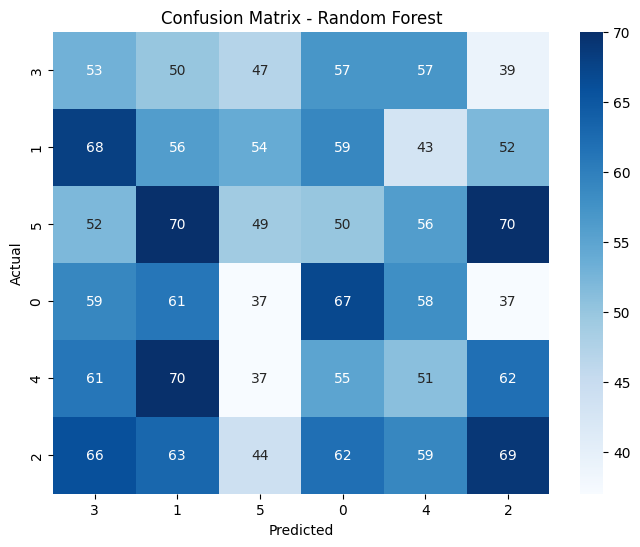


--------------------------------------------------

K-Nearest Neighbors:
  Testing Accuracy: 0.1665
              precision    recall  f1-score   support

           0       0.16      0.26      0.20       319
           1       0.16      0.20      0.18       332
           2       0.17      0.15      0.16       363
           3       0.13      0.12      0.12       303
           4       0.20      0.15      0.17       336
           5       0.19      0.12      0.14       347

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.16      2000
weighted avg       0.17      0.17      0.16      2000



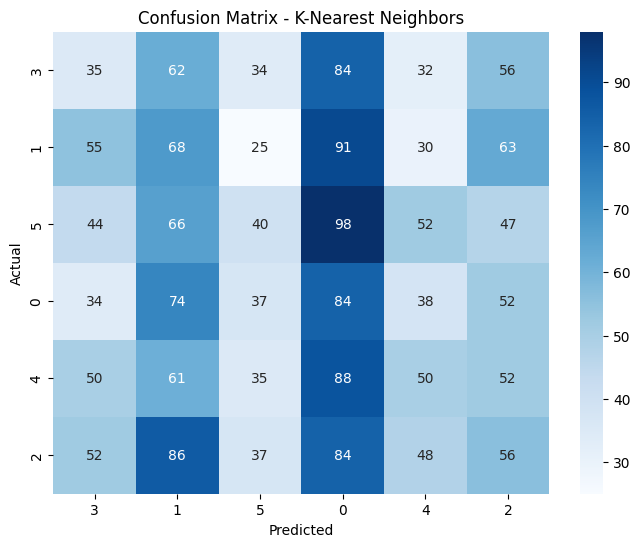


--------------------------------------------------

Logistic Regression:
  Testing Accuracy: 0.1685
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.17      0.56      0.26       332
           2       0.19      0.23      0.20       363
           3       0.00      0.00      0.00       303
           4       0.15      0.21      0.17       336
           5       0.00      0.00      0.00       347

    accuracy                           0.17      2000
   macro avg       0.08      0.17      0.11      2000
weighted avg       0.09      0.17      0.11      2000



c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

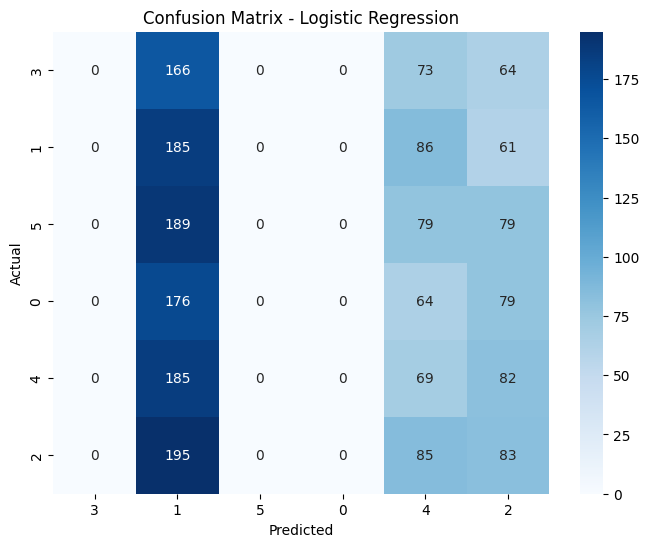


--------------------------------------------------

XGBoost:
  Testing Accuracy: 0.1755
              precision    recall  f1-score   support

           0       0.18      0.20      0.19       319
           1       0.17      0.19      0.18       332
           2       0.20      0.19      0.20       363
           3       0.16      0.16      0.16       303
           4       0.16      0.18      0.17       336
           5       0.19      0.14      0.16       347

    accuracy                           0.18      2000
   macro avg       0.18      0.18      0.17      2000
weighted avg       0.18      0.18      0.18      2000



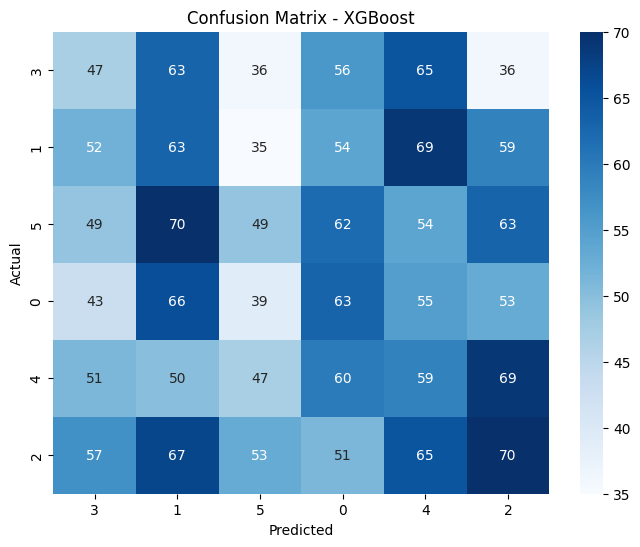


--------------------------------------------------



In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

X = df.drop('Medical Condition', axis=1)
y = df['Medical Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  Testing Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))

    # Plotting confusion matrix using seaborn
    cm = confusion_matrix(y_test, y_pred, labels=df['Medical Condition'].unique())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=df['Medical Condition'].unique(), yticklabels=df['Medical Condition'].unique())
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('\n' + '-'*50 + '\n')
